# <font color='orange'>Clustering: Agglomerative
--- 
</font>

*@ Jorge Alberto Tovar Jiménez*

Este algoritmo es del tipo `Hierarchical`, es el más usado dentro de este tipo y funciona seleccionando clusters individuales (igual a la cantidad de elementos del DF) que se van juntanto con otros hasta llegar a 1 único cluster que contiene a todos los demás.

Funciona a través de una `matriz de proximidad` (n x n) de cada uno de los clusters individuales, que a través de un proceso iterativo va fusionando los 2 más cercanos y actualizando y reduciendo su tamaño hasta al final generar un `dendograma`.

Puede ser más lento que `KMeans` cuando el DataFrame es grande, pero siempre generará los mismos grupos.

Problema: Agrupar a los clientes de una empresa según sus características.

Librerías:

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,edad,genero,nivel_ingresos,estudios,total_empleos
0,19,1,1,0,1
1,18,0,0,0,0
2,29,1,3,2,2
3,25,1,2,1,1
4,27,0,2,1,3


Crear nArray:

In [3]:
X = df.values

Crear matriz de proximidad:

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

Mat = euclidean_distances(X,X)

Crear modelo:

In [5]:
AGG = AgglomerativeClustering(n_clusters=4, linkage='ward')

Entrenar modelo:

In [6]:
AGG.fit(Mat)
AGG

c:\Users\JATJ\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering(n_clusters=4)

Obtener las clasificaciones:

In [7]:
labels = AGG.labels_

Agregar columna de clasificaciones:

In [8]:
df['labels'] = labels
df.head(2)

,edad,genero,nivel_ingresos,estudios,total_empleos,labels
0,19,1,1,0,1,2
1,18,0,0,0,0,2


Librerías para graficar:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_style("darkgrid")   

Gráfica 1:

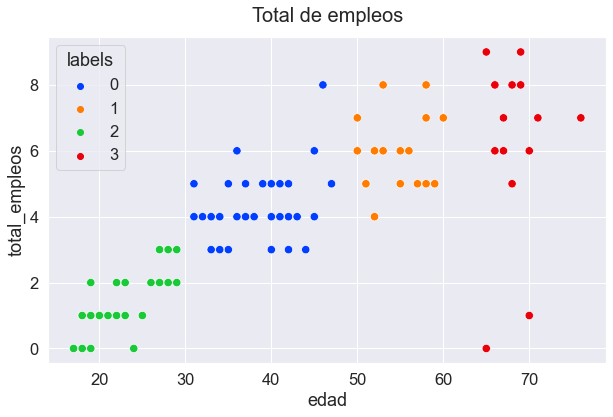

In [10]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='edad', y='total_empleos', hue='labels', palette='bright', s=70)

plt.title("Total de empleos", fontdict={'fontsize': 20}, pad=15)
plt.show();

Gráfica 2:

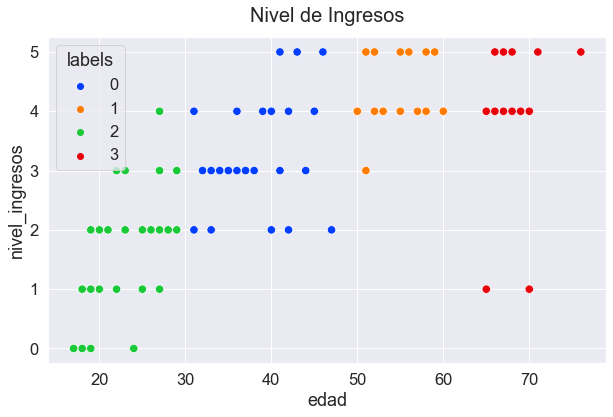

In [11]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='edad', y='nivel_ingresos', hue='labels', palette='bright', s=70)

plt.title("Nivel de Ingresos", fontdict={'fontsize': 20}, pad=15)
plt.show();